In [1]:
library("ggplot2")
library("dplyr")
library("ggpubr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#read in both the tooth and bone volume data
tooth_volume_df = read.csv("summary_of_tooth_volume.csv")
#print(head(tooth_volume_df))

bone_volume_df = read.csv("summary_of_bone_volume.csv")
#print(head(bone_volume_df))

In [28]:
tooth_volume_df$SampleID == bone_volume_df$SampleID

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [5]:
head(tooth_volume_df)

,SampleID,Orientation.side,Segment,Voxel.count,Volume_mm3,Orientation.side.1,Segment.1,Voxel.count.1,Volume_mm3.1,Difference_in_volume,Total_volume,Average_volume,Class,Weight_grams
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,DW_1,Left,tooth,3423971,0.585338,Right,tooth,3431062,0.586550,-0.001212,1.171888,0.5859440,Arthritic,18.1
2,DW_2,Left,tooth,3505580,0.599289,Right,tooth,3597943,0.615079,-0.015790,1.214368,0.6071840,Arthritic,16.0
3,DW_3,Left,tooth,3667232,0.626924,Right,tooth,3515702,0.601020,0.025904,1.227944,0.6139720,Arthritic,17.1
4,DW_4,Left,tooth,3464853,0.592327,Right,tooth,3521769,0.602057,-0.009730,1.194384,0.5971920,Arthritic,13.3
5,DW_5,Left,tooth,3581378,0.612247,Right,tooth,3548398,0.606609,0.005638,1.218856,0.6094280,Arthritic,14.3
6,DW_6,Left,tooth,3683004,0.629620,Right,tooth,3702929,0.633027,-0.003407,1.262647,0.6313235,Arthritic,19.2


In [32]:
#make a new dataframe with the tooth volume, bone volume, sampleID,
#and phenotype. Then add a new column which is bone/tooth volume
num_samples = nrow(tooth_volume_df)
all_results_df = data.frame(matrix(data = 0, nrow = num_samples, ncol = 5))
colnames(all_results_df) = c("SampleID","average_tooth_volume","average_bone_volume","Class","tooth_bone_ratio")
all_results_df$SampleID = tooth_volume_df$SampleID
all_results_df$average_tooth_volume = tooth_volume_df$Average_volume
all_results_df$average_bone_volume = bone_volume_df$Average_volume
all_results_df$Class = tooth_volume_df$Class
all_results_df$bone_to_tooth_ratio = all_results_df$average_bone_volume/all_results_df$average_tooth_volume

head(all_results_df)

,SampleID,average_tooth_volume,average_bone_volume,Class,tooth_bone_ratio,bone_to_tooth_ratio
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,DW_1,0.5859440,0.3376760,Arthritic,0,0.5762940
2,DW_2,0.6071840,0.3318490,Arthritic,0,0.5465378
3,DW_3,0.6139720,0.3355320,Arthritic,0,0.5464940
4,DW_4,0.5971920,0.3010500,Arthritic,0,0.5041092
5,DW_5,0.6094280,0.3482920,Arthritic,0,0.5715064
6,DW_6,0.6313235,0.4608835,Arthritic,0,0.7300275


Warning message in stat_summary(fun = mean, geom = "crossbar", width = 0.5, color = "black", :
“Ignoring unknown parameters: `middle.linewidth`”


agg_record_644223159 
                   2

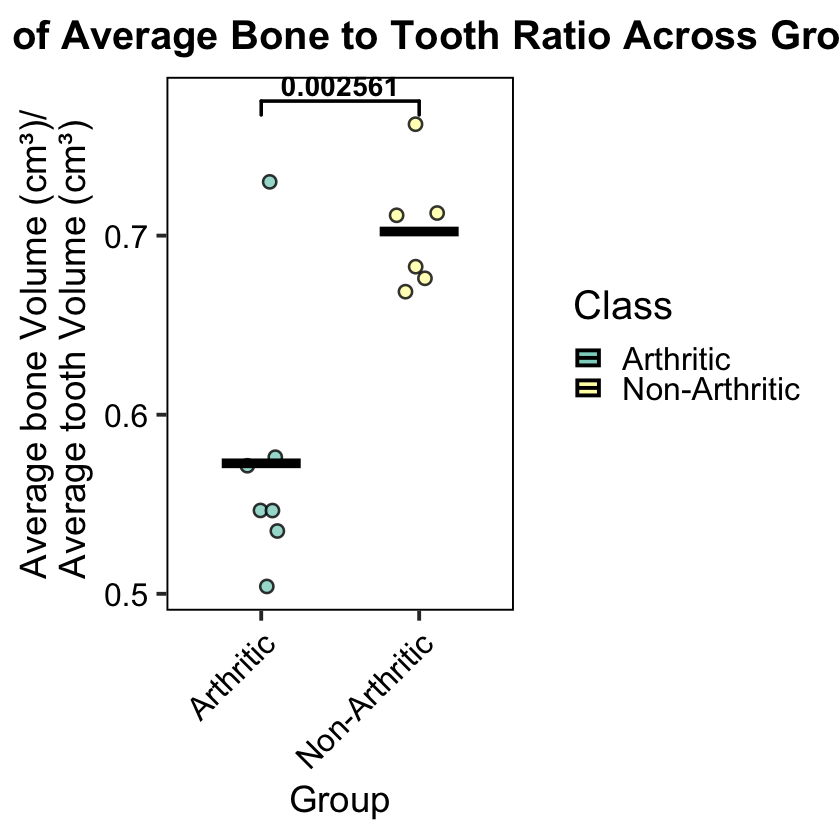

In [33]:
# Comparison groups
my_comparisons <- list(c("Arthritic", "Non-Arthritic"))

# Factor order
all_results_df$Class <- factor(all_results_df$Class, 
                               levels = c("Arthritic", "Non-Arthritic"))

# Dot plot with numeric p-value and thick bracket
tooth_bone_ratio_plot <- ggplot(data = all_results_df, aes(x = Class, y = bone_to_tooth_ratio, fill = Class)) +
  
  # Jittered points
  geom_jitter(width = 0.15, size = 3, alpha = 0.8, shape = 21, color = "black") +
  
  # Mean crossbar
  stat_summary(fun = mean, geom = "crossbar", width = 0.5, color = "black", middle.linewidth = 2) +
  
  # Thick significance bracket with numeric p-value
  geom_signif(
    comparisons = my_comparisons,
    annotations = signif(t.test(bone_to_tooth_ratio ~ Class, data = all_results_df)$p.value, digits = 4), 
    tip_length = 0.03,      # horizontal tips
    textsize = 6,           # p-value text size
    size = 1,               # bracket line thickness
    color = "black",
    fontface = "bold"
  ) +
  
  # Labels
  ylab("Average bone Volume (cm³)/\nAverage tooth Volume (cm³) ") +
  xlab("Group") +
  ggtitle("Comparison of Average Bone to Tooth Ratio Across Groups") +
  
  # Colors
  scale_fill_brewer(palette = "Set3") +
  
  # Theme
  theme_bw(base_size = 24) +
  theme(
    axis.text.x = element_text(color = "black", angle = 45, hjust = 1),
    axis.text.y = element_text(color = "black"),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 24, face = "bold",  hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA)
  ) #+
  
  # Y-axis scale
  #scale_y_continuous(limits = c(0, 2), breaks = seq(0, 2, by = 0.2))

print(tooth_bone_ratio_plot)

pdf(file = "Experiment_1_bone_to_tooth_volume.pdf",   # The directory you want to save the file in
    width = 12, # The width of the plot in inches
    height = 12) # The height of the plot in inches
# Step 2: Create the plot with R code
print(tooth_bone_ratio_plot)
# Step 3: Run dev.off() to create the file!

dev.off()

In [31]:
write.csv(file = "all_bone_and_tooth_data.csv",all_results_df, row.names = FALSE)

In [26]:
#gather data to run a t test
arthritic_df = data.frame(filter(all_results_df, all_results_df$Class == "Arthritic"))
non_arthritic_df = data.frame(filter(all_results_df, all_results_df$Class == "Non-Arthritic"))


In [27]:
t.test(arthritic_df$bone_to_tooth_ratio,non_arthritic_df$bone_to_tooth_ratio)


	Welch Two Sample t-test

data:  arthritic_df$bone_to_tooth_ratio and non_arthritic_df$bone_to_tooth_ratio
t = -4.1617, df = 8.8048, p-value = 0.002561
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.20002016 -0.05883638
sample estimates:
mean of x mean of y 
0.5728625 0.7022908 
